In [1]:
import yaml
import subprocess
import glob
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
# Function to replace the placeholder with the relaxation parameter in the template YAML file
def create_yaml_from_template(template_path, output_path, placeholder, new_value):
    with open(template_path, 'r') as file:
        content = file.read()

    # Replace the placeholder with the new relaxation parameter value
    updated_content = content.replace(placeholder, str(new_value))

    # Write the updated content to the output file
    with open(output_path, 'w') as file:
        file.write(updated_content)

# Function to run the Julia command
def run_julia_command():
    command = ["julia", "--project=@.", "/Users/bphung/Work/software/Norma.jl/src/Norma.jl", "cubes.yaml"]
    subprocess.run(command, check=True)

# Function to read the latest convergence values CSV file into a NumPy array
def read_latest_convergence_values():
    # Get the latest file matching the pattern
    list_of_files = glob.glob("convergence_values-*.csv")
    latest_file = max(list_of_files, key=os.path.getctime)

    # Read the CSV file into a NumPy array
    data = np.loadtxt(latest_file, delimiter=',', skiprows=0)  # Adjust skiprows if there's a header
    return data

def calculate_convergence_rate(errors):
    """Calculate the convergence rate for the last half of the error values."""
    n = len(errors)
    if n < 2:
        print(errors)
        raise ValueError("Not enough data points to calculate convergence rate.")
    
    # Extract the last half of the errors
    last_half_errors = errors[n // 2:]

    # Calculate log of the errors
    log_errors = np.log(last_half_errors)

    # Create an array of iteration indices for the last half
    iterations = np.arange(len(log_errors))

    # Fit a linear polynomial (degree 1) to the log errors
    slope, intercept = np.polyfit(iterations, log_errors, 1)
    return slope

In [3]:
number_of_iterations = []
rate_of_convergence_a = []
rate_of_convergence_r = []
relaxation_parameters = np.linspace(0,1.0,21)
for relaxation in relaxation_parameters:
    template_file_path = "cubes-template.yaml"
    output_file_path = "cubes.yaml"
    placeholder = "{replace_yaml}"  # Placeholder to be replaced
    new_relaxation_value = relaxation  # Change this to the desired relaxation parameter value

    # Create cubes.yaml from the template
    create_yaml_from_template(template_file_path, output_file_path, placeholder, new_relaxation_value)

    # Run the Julia command
    run_julia_command()

    # Read the latest convergence values into a NumPy array
    convergence_data = read_latest_convergence_values()
    convergence_data = convergence_data[np.nonzero(convergence_data)]
    convergence_absolute = convergence_data[0::2]
    convergence_relative = convergence_data[1::2]
    number_of_iterations.append(len(convergence_data) // 2 )
    try:
        convergence_rate_a = calculate_convergence_rate(convergence_absolute)
        convergence_rate_r = calculate_convergence_rate(convergence_relative)
    except:
       convergence_rate_a = -np.log(convergence_absolute[-1])
       convergence_rate_r = -np.log(convergence_relative[-1])
    rate_of_convergence_a.append(convergence_rate_a)
    rate_of_convergence_r.append(convergence_rate_r)


[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.635841297071039e-7
|R|=3.11049794681696e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.2426664147747007e-7
|R|=1.0563872573789277e-7, solver iteration=1
Schwarz criterion |ΔX|=0.07190443294317003 |ΔX|/|X|=0.5454762379904537
Schwarz iteration=2
subcycle cube-1.yaml
|R|=1.635841297071039e-7
|R|=3.11049794681696e-8, 

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.36903945171274e-7
|R|=6.786813247267394e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.9641415613023757e-7
|R|=8.244660528944011e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07253107765571547 |ΔX|/|X|=0.5501917651467537
Schwarz iteration=2
subcycle cube-1.yaml
|R|=142582.69968541965
|R|=1.7229392710939816e-7, s

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.6455117915600477e-7
|R|=2.1370280420679565e-7, solver iteration=1
subcycle cube-2.yaml
|R|=1.6166110221338775e-7
|R|=8.172798654433735e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07318249405772431 |ΔX|/|X|=0.5550241201626632
Schwarz iteration=2
subcycle cube-1.yaml
|R|=285016.13063029584
|R|=1.3720633856953085e-7

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.8666789018903916e-7
|R|=1.5116472846730266e-7, solver iteration=1
subcycle cube-2.yaml
|R|=1.8644772696807672e-7
|R|=8.471099442998086e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07385802670466579 |ΔX|/|X|=0.5599664684009084
Schwarz iteration=2
subcycle cube-1.yaml
|R|=427300.30904259393
|R|=1.399778929098148e-7,

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=2.0457130790578452e-7
|R|=5.089356043267224e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.5763283680380833e-7
|R|=8.390276881687148e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07455702007520305 |ΔX|/|X|=0.5650119267532383
Schwarz iteration=2
subcycle cube-1.yaml
|R|=569435.2511122349
|R|=1.5378668484694278e-7, 

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=2.0413157800027062e-7
|R|=2.1346640076446103e-8, solver iteration=1
subcycle cube-2.yaml
|R|=2.120348706304205e-7
|R|=7.883115336847098e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07527882064611645 |ΔX|/|X|=0.5701535893269738
Schwarz iteration=2
subcycle cube-1.yaml
|R|=711420.9730108575
|R|=1.7798236089582305e-7, 

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.559470593633108e-7
|R|=1.893657020594717e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.5812662104087024e-7
|R|=9.060549669137928e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07602277878922171 |ΔX|/|X|=0.5753845517631412
Schwarz iteration=2
subcycle cube-1.yaml
|R|=853257.4908922564
|R|=1.8467074197280825e-7, s

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=2.0574478697216802e-7
|R|=6.886007126232754e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.4396507603011344e-7
|R|=6.174973545221473e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07678825049047901 |ΔX|/|X|=0.5806979341129823
Schwarz iteration=2
subcycle cube-1.yaml
|R|=994944.8208920171
|R|=1.621630545275721e-7, s

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.7512683500225497e-7
|R|=3.752177374313774e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.8497656196581762e-7
|R|=3.892543575582949e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07757459889378092 |ΔX|/|X|=0.5860869022227748
Schwarz iteration=2
subcycle cube-1.yaml
|R|=1.1364829791275708e6
|R|=2.3676974771531165e-

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.6055396902049096e-7
|R|=3.291949627081769e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.4305595824144093e-7
|R|=7.38228625568696e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07838119567384944 |ΔX|/|X|=0.5915446875976733
Schwarz iteration=2
subcycle cube-1.yaml
|R|=1.2778719816983864e6
|R|=1.4984452728152896e-7

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.652924131072761e-7
|R|=8.527000154955336e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.5964535843335738e-7
|R|=4.3764534743128903e-8, solver iteration=1
Schwarz criterion |ΔX|=0.07920742224427196 |ΔX|/|X|=0.5970646057336448
Schwarz iteration=2
subcycle cube-1.yaml
|R|=1.419111844685734e6
|R|=1.2724593347288827e-7

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.66462084254564e-7
|R|=9.768037753940358e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.1613947847567243e-7
|R|=4.127457584559254e-8, solver iteration=1
Schwarz criterion |ΔX|=0.08005267080798328 |ΔX|/|X|=0.6026400729225377
Schwarz iteration=2
subcycle cube-1.yaml
|R|=1.5602025841528845e6
|R|=1.5141167810625912e-7,

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.3969017482439925e-7
|R|=5.843958856639261e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.5484688271149593e-7
|R|=6.048718124695298e-8, solver iteration=1
Schwarz criterion |ΔX|=0.08091634525847745 |ΔX|/|X|=0.6082646215489932
Schwarz iteration=2
subcycle cube-1.yaml
|R|=1.7011442161448745e6
|R|=1.2838854710218542e-

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.947173650705295e-7
|R|=8.127377809024677e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.4791214708459033e-7
|R|=7.107056676386331e-8, solver iteration=1
Schwarz criterion |ΔX|=0.08179786194073624 |ΔX|/|X|=0.6139319139093784
Schwarz iteration=2
subcycle cube-1.yaml
|R|=1.8419367566888172e6
|R|=1.753616120429515e-7,

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.566207845790758e-7
|R|=7.982144213768854e-8, solver iteration=1
subcycle cube-2.yaml
|R|=2.000569921669234e-7
|R|=1.0150085255455638e-7, solver iteration=1
Schwarz criterion |ΔX|=0.08269665028132157 |ΔX|/|X|=0.619635754592406
Schwarz iteration=2
subcycle cube-1.yaml
|R|=1.9825802217939226e6
|R|=1.5118463198177635e-7,

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.666219836054901e-7
|R|=1.3157764742210768e-7, solver iteration=1
subcycle cube-2.yaml
|R|=1.5792317393820484e-7
|R|=4.710910428624352e-8, solver iteration=1
Schwarz criterion |ΔX|=0.08361215329732574 |ΔX|/|X|=0.625370101468716
Schwarz iteration=2
subcycle cube-1.yaml
|R|=2.123074627450981e6
|R|=1.297779777382874e-7, 

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.9701732609081468e-7
|R|=2.0241916743347785e-7, solver iteration=1
subcycle cube-2.yaml
|R|=1.7592521122813698e-7
|R|=7.50327504333733e-8, solver iteration=1
Schwarz criterion |ΔX|=0.0845438279939383 |ΔX|/|X|=0.6311290753426868
Schwarz iteration=2
subcycle cube-1.yaml
|R|=2.2634199896328487e6
|R|=1.8524767260942633e-7

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=2.1585733499255661e-7
|R|=4.3868343813962914e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.126756364314339e-7
|R|=4.305256277741847e-8, solver iteration=1
Schwarz criterion |ΔX|=0.08549114566029978 |ΔX|/|X|=0.636906968324288
Schwarz iteration=2
subcycle cube-1.yaml
|R|=2.403616324294196e6
|R|=1.7363188464587896e-7,

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.4440907856580326e-7
|R|=2.6842565556208335e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.869116677006191e-7
|R|=6.301348432172081e-8, solver iteration=1
Schwarz criterion |ΔX|=0.08645359207309657 |ΔX|/|X|=0.6426982509820132
Schwarz iteration=2
subcycle cube-1.yaml
|R|=2.5436636473720474e6
|R|=1.2636036945456967e-

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=1.5890015916354652e-7
|R|=2.7525858576581993e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.5459464349071161e-7
|R|=5.246619945456705e-8, solver iteration=1
Schwarz criterion |ΔX|=0.08743066761703827 |ΔX|/|X|=0.6484975783401413
Schwarz iteration=2
subcycle cube-1.yaml
|R|=2.6835619747849e6
|R|=1.3147423790345743e-7,

[ Info: Debugging disabled


Reading simulation file: cubes.yaml
Reading subsimulation file: cube-1.yaml
Reading subsimulation file: cube-2.yaml
Requested time step is 0.0001
Adjusted time step is 0.0001 with 3 stops
Initializing run at stop 0 with time = -1.00e-04
Computing initial acceleration
Computing initial acceleration
contact false
Advancing from stop 0 with time = -1.00e-04 to stop 1 with time = 0.00e+00
subcycle cube-1.yaml
|R|=1.2052675715049914e-7
|R|=1.624061800533193e-8, solver iteration=1
subcycle cube-2.yaml
|R|=5.238483814172649e-8
|R|=2.7862466800504003e-8, solver iteration=1
contact true
Contact initiation detected, redoing control step
Schwarz iteration=1
subcycle cube-1.yaml
|R|=2.1304147969388767e-7
|R|=4.419162849282186e-8, solver iteration=1
subcycle cube-2.yaml
|R|=1.4817438293133017e-7
|R|=9.41912355127913e-8, solver iteration=1
Schwarz criterion |ΔX|=0.0884218873309629 |ΔX|/|X|=0.6542997947847805
Schwarz iteration=2
subcycle cube-1.yaml
|R|=2.823311322433449e6
|R|=1.96457588535121e-7, so

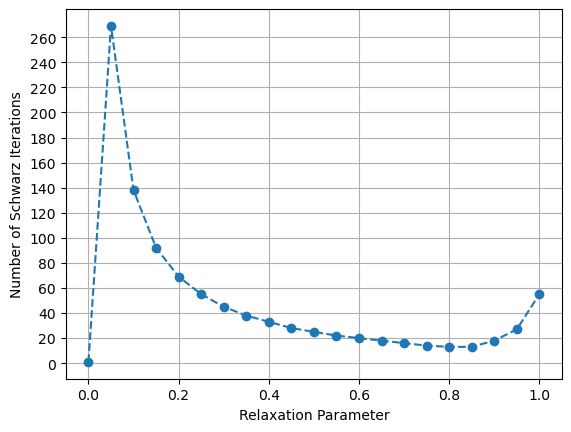

In [13]:

# number_of_iterations = []
# rate_of_convergence_a = []
# rate_of_convergence_r = []
# relaxation_parameters = np.linspace(0,1.0,11)
plt.plot(relaxation_parameters, np.array(number_of_iterations), 'o--')
plt.xlabel('Relaxation Parameter')
plt.ylabel('Number of Schwarz Iterations')
plt.yticks(np.arange(0, np.max(number_of_iterations), step=20))
plt.grid()
plt.savefig('Schwarz_Iterations.png')


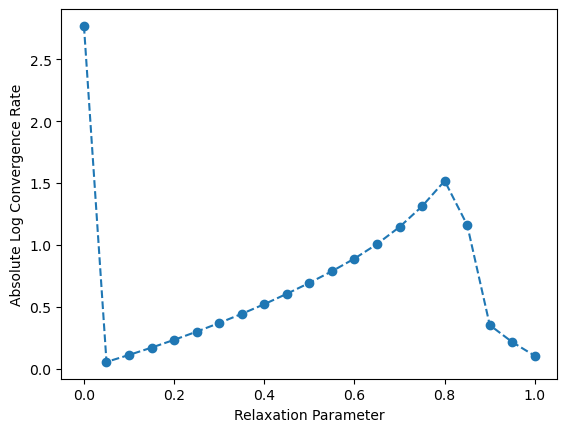

In [9]:
plt.plot(relaxation_parameters, np.abs(rate_of_convergence_a), 'o--')
plt.xlabel('Relaxation Parameter')
plt.ylabel('Absolute Log Convergence Rate')
plt.savefig('absolute_convergence.png')

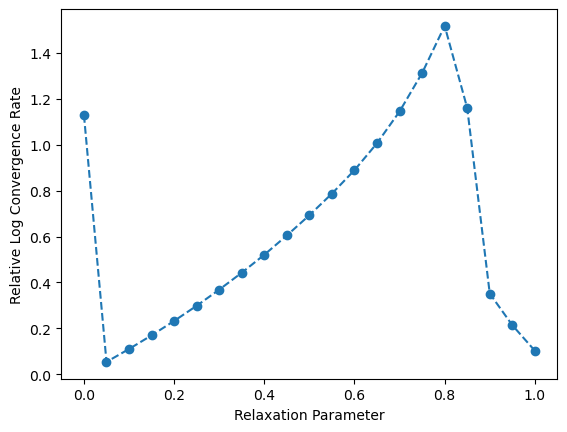

In [10]:
plt.plot(relaxation_parameters, np.abs(rate_of_convergence_r), 'o--')
plt.xlabel('Relaxation Parameter')
plt.ylabel('Relative Log Convergence Rate')
plt.savefig('relative_convergence.png')